In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Step 1: Import the dataset
# Ensure that categorical variables are imported as characters, not factors
bank_data = pd.read_csv("../data/raw/bank-full.csv", sep=";", dtype={"job": str, "marital": str, "education": str, "default": str, "housing": str, "loan": str, "contact": str, "month": str, "poutcome": str, "y": str})

# Step 2: Take a quick look at the data
# Display the first few rows of the dataset and check variable types
print(bank_data.head())
print(bank_data.dtypes)

# Check for missing values in the entire DataFrame
missing_values = bank_data.isnull().sum()

# check the percentage of missing values in each column:
percentage_missing = (missing_values / len(bank_data)) * 100

# Create a summary DataFrame to display the missing value count and percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Display the summary DataFrame
print(missing_data)

bank_data.info()

print(bank_data["job"].value_counts())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age           int64
job          object
marital      object
education    object
default      object
balance    

In [2]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: ylabel='age'>

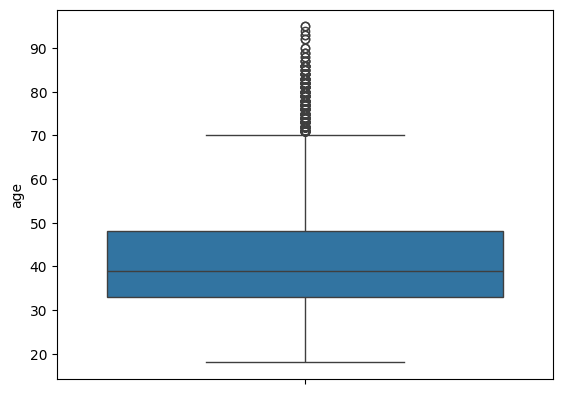

In [3]:
#boxplot for age

import seaborn as sns

sns.boxplot(data = bank_data, y = "age")



<Axes: ylabel='balance'>

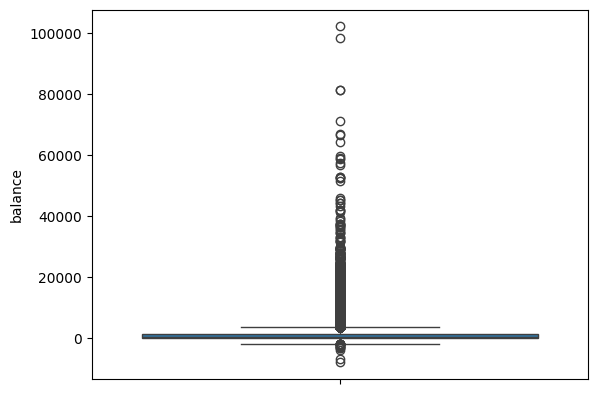

In [4]:
#boxplot for balance

sns.boxplot(data = bank_data, y = "balance")

In [5]:
# Calculate mean, std deviation, q1, q3, and IQR for 'age' and 'balance'

age_mean = bank_data['age'].mean()
age_std = bank_data['age'].std()
age_q1 = bank_data['age'].quantile(0.25)
age_q3 = bank_data['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
print(age_iqr)

balance_mean = bank_data['balance'].mean()
balance_std = bank_data['balance'].std()
balance_q1 = bank_data['balance'].quantile(0.25)
balance_q3 = bank_data['balance'].quantile(0.75)
balance_iqr = balance_q3 - balance_q1
print(balance_iqr)

15.0
1356.0


C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[<Axes: title={'center': 'age'}>]], dtype=object)

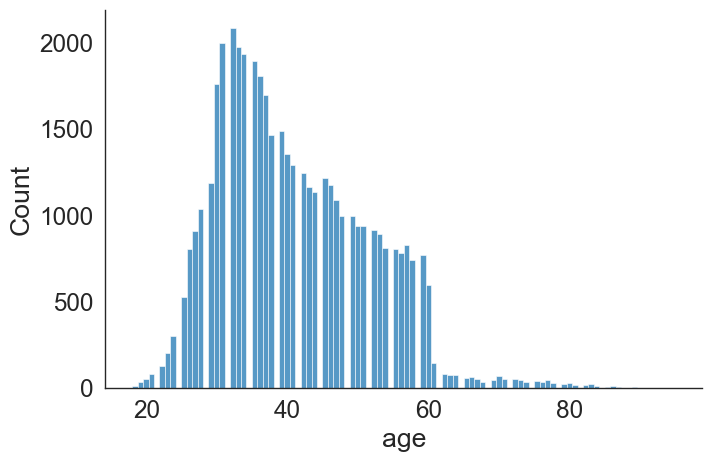

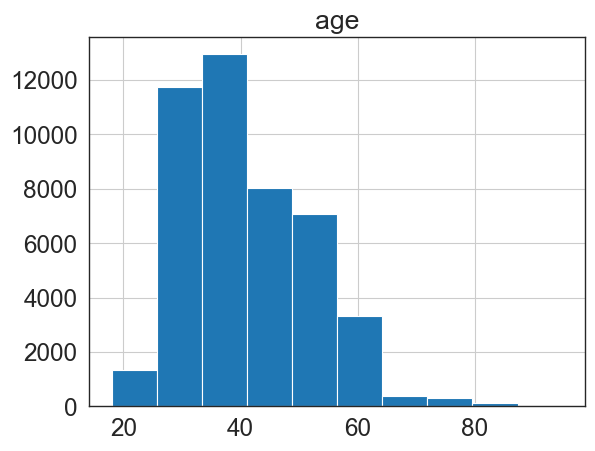

In [6]:
#find distribution of age by dist plot

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=bank_data, x="age", kind="hist", bins = 100, aspect = 1.5)

# plot histogram
bank_data.hist(column='age')

C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[<Axes: title={'center': 'balance'}>]], dtype=object)

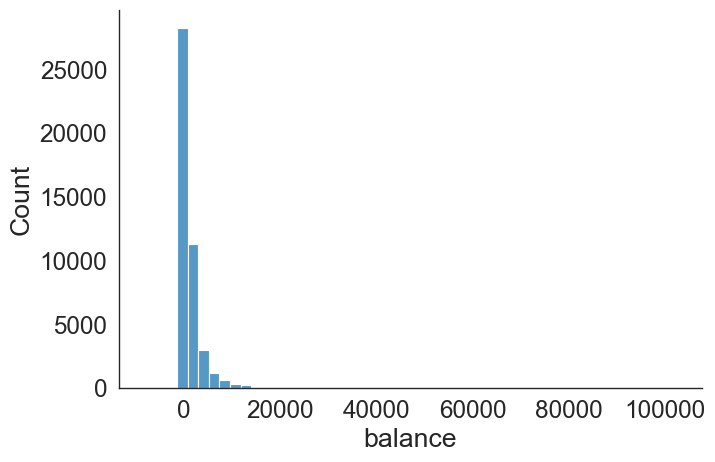

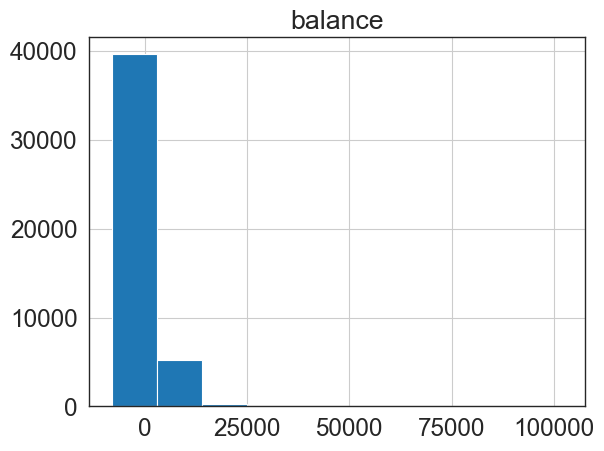

In [7]:
#find distribution of balance by dist plot

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=bank_data, x="balance", kind="hist", bins = 50, aspect = 1.5)

# plot histogram
bank_data.hist(column='balance')

In [8]:
def detect_outliers(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(x)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = detect_outliers(bank_data, 'age')
print(possible_outliers_tm)

[83, 75, 75, 83, 75, 72, 71, 76, 83, 71, 85, 72, 90, 71, 82, 73, 74, 71, 75, 78, 85, 80, 71, 78, 73, 75, 94, 72, 83, 79, 78, 83, 73, 76, 83, 77, 73, 74, 73, 77, 71, 71, 80, 82, 75, 77, 78, 78, 86, 76, 72, 74, 77, 74, 79, 71, 74, 78, 73, 73, 95, 74, 71, 78, 71, 75, 75, 82, 74, 81, 76, 72, 75, 72, 71, 72, 77, 73, 85, 83, 78, 73, 79, 71, 71, 80, 72, 78, 79, 71, 82, 81, 79, 71, 79, 79, 73, 75, 72, 71, 75, 78, 75, 80, 80, 74, 73, 71, 72, 72, 77, 79, 73, 71, 80, 71, 83, 71, 73, 78, 72, 81, 81, 71, 74, 75, 82, 80, 76, 74, 74, 77, 71, 71, 77, 76, 72, 74, 74, 72, 73, 82, 77, 71, 79, 89, 76, 81, 74, 73, 71, 71, 77, 72, 84, 86, 72, 72, 76, 73, 74, 82, 71, 83, 72, 73, 73, 74, 72, 78, 86, 76, 79, 71, 81, 77, 82, 72, 73, 73, 74, 71, 73, 76, 71, 71, 83, 71, 80, 79, 77, 74, 84, 95, 77, 78, 79, 83, 83, 73, 77, 72, 74, 83, 76, 73, 81, 80, 75, 74, 75, 77, 83, 72, 81, 73, 74, 80, 72, 76, 72, 77, 74, 87, 76, 92, 78, 82, 78, 76, 73, 77, 76, 73, 82, 81, 80, 71, 76, 74, 75, 72, 80, 84, 87, 72, 76, 78, 73, 78,

In [9]:
from scipy.stats import shapiro

def calculate_outlier_limits_normal(data):
    # Perform Shapiro-Wilk test for normality
    _, p_value = shapiro(data)
    
    if p_value > 0.05:  # If p-value > 0.05, assume normal distribution
        mean = data.mean()
        sd = data.std()
        lower_limit = mean - 3 * sd
        upper_limit = mean + 3 * sd
        return lower_limit, upper_limit
    else:
        return None, None  # If not normal, return None for limits

def remove_outliers(df, features):
    df_cleaned = df.copy()  # Create a copy of the original DataFrame
    
    for feature in features:
        # Calculate outlier limits based on normality test
        lower_limit, upper_limit = calculate_outlier_limits_normal(df_cleaned[feature])
        
        if lower_limit is not None and upper_limit is not None:  # If normal distribution
            df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_limit) & (df_cleaned[feature] <= upper_limit)]
        else:  # If not normal distribution, use detect_outliers function
            outliers_prob, outliers_poss = detect_outliers(df_cleaned, feature)
            df_cleaned = df_cleaned[~df_cleaned[feature].isin(outliers_poss)]
    
    return df_cleaned

# Remove outliers by calling the function
features_to_clean = ['age', 'balance']
bank_data_wo_outliers = remove_outliers(bank_data, features_to_clean)
bank_data_wo_outliers.describe()

C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,age,balance,day,duration,campaign,pdays,previous
count,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000
mean,40.279679,630.696637,15.770935,255.625412,2.779529,40.138353,0.562256
std,9.891699,833.029043,8.367605,255.514021,3.122843,101.217659,2.317158
min,18.000000,-1884.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,44.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,344.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,967.000000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,70.000000,3413.000000,31.000000,3881.000000,58.000000,871.000000,275.000000


In [10]:
# Calculate percentage cross table for job and y
job_y_cross_table = pd.crosstab(bank_data['job'], bank_data['y'], normalize='index').round(2)

# Calculate percentage cross table for month and y
month_y_cross_table = pd.crosstab(bank_data['month'], bank_data['y'], normalize='index').round(2)

print("Percentage Cross Table for job and y:")
print(job_y_cross_table)
print("\nPercentage Cross Table for month and y:")
print(month_y_cross_table)


Percentage Cross Table for job and y:
y                no   yes
job                      
admin.         0.88  0.12
blue-collar    0.93  0.07
entrepreneur   0.92  0.08
housemaid      0.91  0.09
management     0.86  0.14
retired        0.77  0.23
self-employed  0.88  0.12
services       0.91  0.09
student        0.71  0.29
technician     0.89  0.11
unemployed     0.84  0.16
unknown        0.88  0.12

Percentage Cross Table for month and y:
y        no   yes
month            
apr    0.80  0.20
aug    0.89  0.11
dec    0.53  0.47
feb    0.83  0.17
jan    0.90  0.10
jul    0.91  0.09
jun    0.90  0.10
mar    0.48  0.52
may    0.93  0.07
nov    0.90  0.10
oct    0.56  0.44
sep    0.54  0.46


In [11]:
def merge_job_categories(job):
    if job in ['admin.', 'self-employed', 'unknown']:
        return 'job_1'
    elif job in ['blue-collar', 'entrepreneur', 'housemaid', 'services']:
        return 'job_2'
    elif job in ['management', 'unemployed']:
        return 'job_3'
    elif job == 'retired':
        return 'job_4'
    elif job == 'student':
        return 'job_5'
    else: # for 'technician'
        return 'job_6'

# Apply merged categories
bank_data['job_merged'] = bank_data['job'].apply(merge_job_categories)


In [12]:
def merge_month_categories(month):
    if month in ['apr', 'feb']:
        return 'mon_1'
    elif month in ['aug', 'jan', 'jun', 'nov']:
        return 'mon_2'
    elif month in ['dec', 'mar', 'oct', 'sep']:
        return 'mon_3'
    else: # for 'jul' and 'may'
        return 'mon_4'

# Apply month categories 
bank_data['month_merged'] = bank_data['month'].apply(merge_month_categories)


In [13]:
# Select categorical columns
categorical_columns = bank_data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

num_categorical_columns = len(categorical_columns)
print("Number of categorical variables:", num_categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'job_merged', 'month_merged']
Number of categorical variables: 12


In [14]:
# Get the different values and their counts for each categorical column
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month_merged', 'job_merged']

def print_value_counts(df, categorical_columns):
    for col in categorical_columns:
        print("Value counts for", col)
        print(df[col].value_counts())
        print("\n")

# Assuming df is the DataFrame and categorical_columns is the list of categorical column names
print_value_counts(bank_data, categorical_columns)

Value counts for marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Value counts for education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Value counts for default
no     44396
yes      815
Name: default, dtype: int64


Value counts for housing
yes    25130
no     20081
Name: housing, dtype: int64


Value counts for loan
no     37967
yes     7244
Name: loan, dtype: int64


Value counts for contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


Value counts for month_merged
mon_4    20661
mon_2    16961
mon_1     5581
mon_3     2008
Name: month_merged, dtype: int64


Value counts for job_merged
job_2    16613
job_3    10761
job_6     7597
job_1     7038
job_4     2264
job_5      938
Name: job_merged, dtype: int64




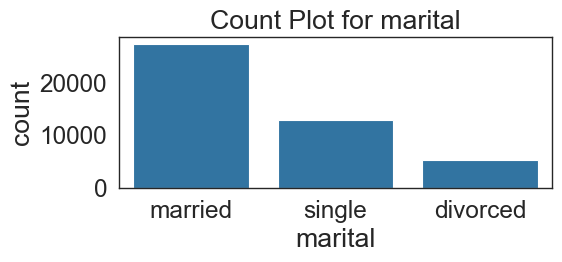

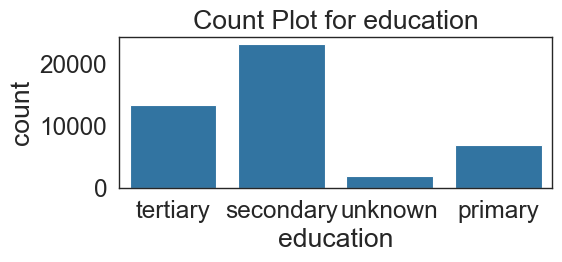

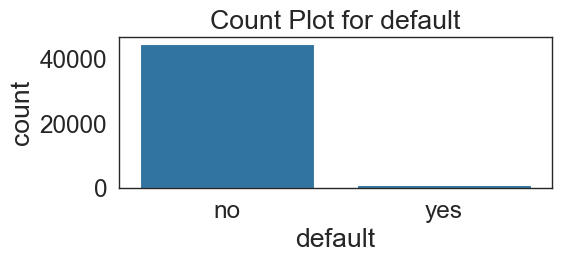

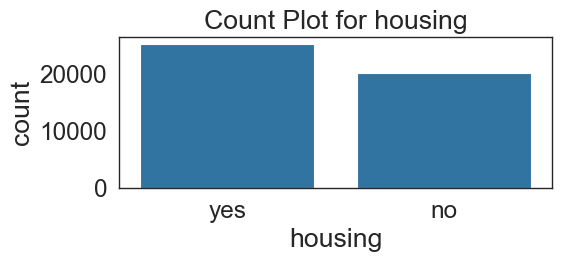

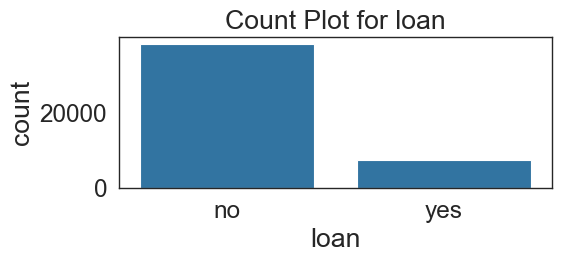

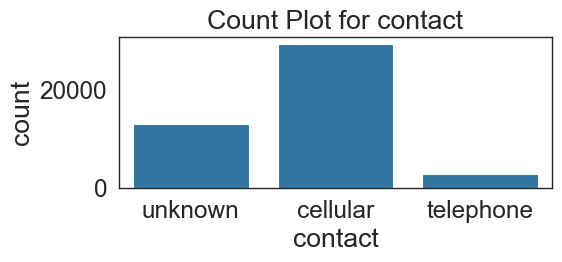

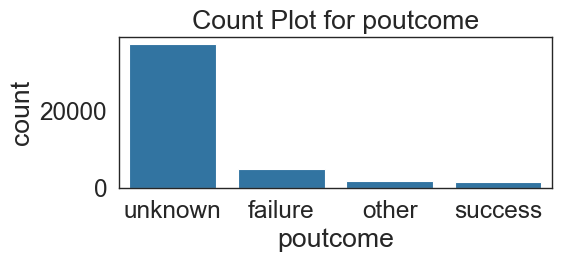

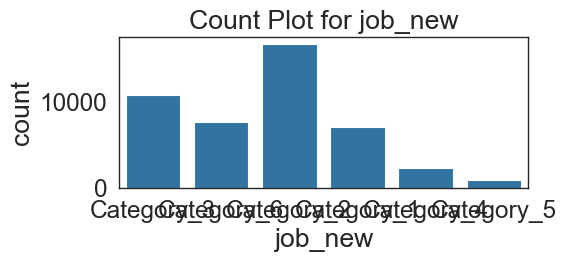

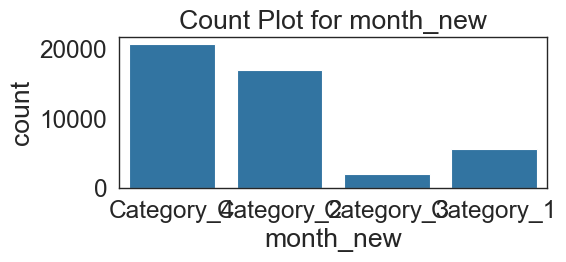

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = bank_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('y')  # exclude the output label 'y'

for col in categorical_columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=bank_data)
    plt.title('Count Plot for {}'.format(col))
    plt.tight_layout()
    plt.show()


In [16]:
# Select the categorical columns (excluding education and poutcome)
categorical_sub_columns = ['job_merged', 'marital', 'default', 'housing', 'loan', 'contact', 'month_merged']

# Perform one-hot encoding
encoded_data = pd.get_dummies(bank_data, columns=categorical_sub_columns)

# Select the newly added columns
new_columns = encoded_data.columns.difference(bank_data.columns)

# Print the head of the newly added columns
print(encoded_data[new_columns].head())

   contact_cellular  contact_telephone  contact_unknown  default_no  \
0                 0                  0                1           1   
1                 0                  0                1           1   
2                 0                  0                1           1   
3                 0                  0                1           1   
4                 0                  0                1           1   

   default_yes  housing_no  housing_yes  job_merged_job_1  job_merged_job_2  \
0            0           0            1                 0                 0   
1            0           0            1                 0                 0   
2            0           0            1                 0                 1   
3            0           0            1                 0                 1   
4            0           1            0                 1                 0   

   job_merged_job_3  ...  job_merged_job_6  loan_no  loan_yes  \
0                 1  ...         

In [17]:
# Define the custom mapping for poutcome and education
poutcome_mapping = {
    'unknown': 0,
    'failure': 1,
    'other': 2,
    'success': 3
}

education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

# Perform ordinal encoding using pandas map
encoded_data['poutcome'] = encoded_data['poutcome'].map(poutcome_mapping)
encoded_data['education'] = encoded_data['education'].map(education_mapping)

encoded_data['y'] = encoded_data['y'].replace({'no': 0, 'yes': 1})


# Select the newly added columns
new_columns = ['poutcome', 'education']

# Print the head of the newly added columns
print(encoded_data[new_columns].head(10))


print(encoded_data['y'])

   poutcome  education
0         0          3
1         0          2
2         0          2
3         0          0
4         0          0
5         0          3
6         0          3
7         0          3
8         0          1
9         0          2
0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [25]:

print(encoded_data.head())
encoded_data.info()

   age  education  balance  day  duration  campaign  pdays  previous  \
0   58          3     2143    5       261         1     -1         0   
1   44          2       29    5       151         1     -1         0   
2   33          2        2    5        76         1     -1         0   
3   47          0     1506    5        92         1     -1         0   
4   33          0        1    5       198         1     -1         0   

   poutcome  y  ...  housing_yes  loan_no  loan_yes  contact_cellular  \
0         0  0  ...            1        1         0                 0   
1         0  0  ...            1        1         0                 0   
2         0  0  ...            1        0         1                 0   
3         0  0  ...            1        1         0                 0   
4         0  0  ...            0        1         0                 0   

   contact_telephone  contact_unknown  month_merged_mon_1  month_merged_mon_2  \
0                  0                1          

In [24]:
print(encoded_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 45211 non-null  int64
 1   education           45211 non-null  int64
 2   balance             45211 non-null  int64
 3   day                 45211 non-null  int64
 4   duration            45211 non-null  int64
 5   campaign            45211 non-null  int64
 6   pdays               45211 non-null  int64
 7   previous            45211 non-null  int64
 8   poutcome            45211 non-null  int64
 9   y                   45211 non-null  int64
 10  job_merged_job_1    45211 non-null  uint8
 11  job_merged_job_2    45211 non-null  uint8
 12  job_merged_job_3    45211 non-null  uint8
 13  job_merged_job_4    45211 non-null  uint8
 14  job_merged_job_5    45211 non-null  uint8
 15  job_merged_job_6    45211 non-null  uint8
 16  marital_divorced    45211 non-null  uint

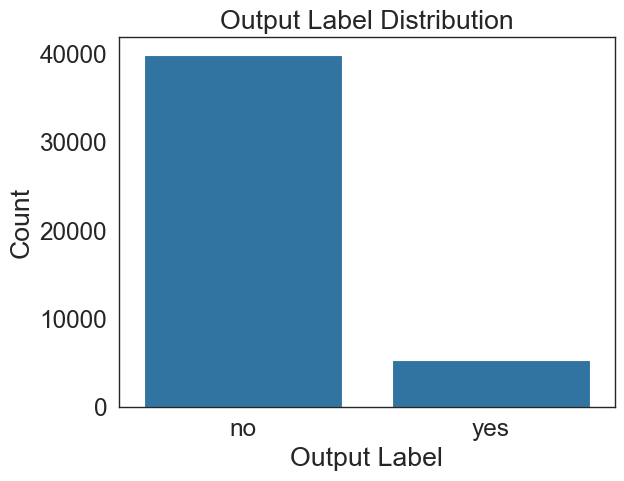

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of output labels
sns.countplot(data=bank_data, x='y')
plt.xlabel('Output Label')
plt.ylabel('Count')
plt.title('Output Label Distribution')
plt.show()




In [27]:
label_percentages = bank_data['y'].value_counts(normalize=True) * 100

# Display the percentages
print(label_percentages)

no     88.30152
yes    11.69848
Name: y, dtype: float64


In [33]:
# Split the data in train and test

from sklearn.model_selection import train_test_split
X = encoded_data.drop('y', axis=1)
y = encoded_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Standardize the data before calculating VIF
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [49]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_train_scaled_df, columns=X_train.columns).corr().abs()

# Find pairs of features with correlation equal to 1
perfect_multicollinearity = np.where(correlation_matrix == 1)
perfect_multicollinearity_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j]) for i, j in zip(*perfect_multicollinearity) if i != j and i < j]

print("Perfectly correlated feature pairs:")
print(perfect_multicollinearity_pairs)

X_train_scaled_df = X_train_scaled_df.drop(columns=['housing_no','housing_yes'])


X_train_scaled_df.info()

Perfectly correlated feature pairs:
[('default_no', 'default_yes'), ('housing_no', 'housing_yes'), ('loan_no', 'loan_yes')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 36168 non-null  float64
 1   education           36168 non-null  float64
 2   balance             36168 non-null  float64
 3   day                 36168 non-null  float64
 4   duration            36168 non-null  float64
 5   campaign            36168 non-null  float64
 6   pdays               36168 non-null  float64
 7   previous            36168 non-null  float64
 8   poutcome            36168 non-null  float64
 9   job_merged_job_1    36168 non-null  float64
 10  job_merged_job_2    36168 non-null  float64
 11  job_merged_job_3    36168 non-null  float64
 12  job_merged_job_4    36168 non-null  float64
 13  job_merged_job_5    36168 n

KeyError: ('default_yes', 'housing_yes', 'loan_yes')